In [9]:
import pandas as pd 
import scanpy as sc
import numpy as np

In [2]:
outdir="/home/jovyan/data/lung_adult_scATAC/"

In [4]:
peak_anno_df = pd.read_csv(outdir + "ATACpeaks_annotation.csv", index_col=0)
peak_anno_df.index = peak_anno_df["peak_id"]
peak_anno_df.drop("peak_id",1, inplace=True)

In [15]:
peak_anno_df

,peak_width,exon,gene,promoter,annotation,gene_name,gene_id,tss_distance,ENCODE_blacklist
peak_id,,,,,,,,,
chr1:10051-10391,341,0,0,0,intergenic,NaN,NaN,58699,1
chr1:108216-108524,309,0,0,0,intergenic,NaN,NaN,39124,1
chr1:180687-181608,922,0,0,1,promoter,FO538757.2,ENSG00000279928,784,1
chr1:182677-182877,201,1,1,0,exon,FO538757.2,ENSG00000279928,283,1
chr1:184058-184553,496,1,1,0,exon,FO538757.2,ENSG00000279928,1664,1
...,...,...,...,...,...,...,...,...,...
chrY:56867566-56867766,201,0,0,0,intergenic,NaN,NaN,31245403,1
chrY:56869760-56870032,273,0,0,0,intergenic,NaN,NaN,31247597,1
chrY:56870743-56871033,291,0,0,0,intergenic,NaN,NaN,31248580,1


In [12]:
np.sum(peak_anno_df.ENCODE_blacklist==0)

396247

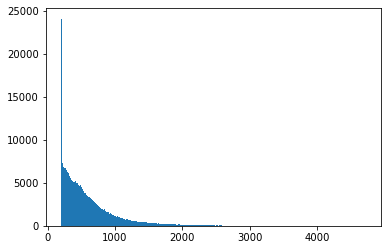

In [19]:
import matplotlib.pyplot as plt
plt.hist(peak_anno_df.peak_width, bins=500);

In [31]:
np.sum(peak_anno_df.peak_width < 210)

23437

In [32]:
input={'cnts':'/warehouse/cellgeni/tic-619/results400k-627-13samples/peak_matrix/peaks_bc_matrix.mmtx.gz',
      "bcs": '/warehouse/cellgeni/tic-619/results400k-627-13samples/peak_matrix/bc.txt'}

In [33]:
adata = sc.read_mtx(input["cnts"]).T